In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the bitstream and parameters
bitstream = '0001110101'
bit_duration_seconds = 1  # Duration of each bit in seconds
samples_per_bit = 100     # Number of samples per bit for smooth plotting

# Total number of samples
total_samples = samples_per_bit * len(bitstream)

# Time vector in seconds
t_seconds = np.linspace(0, len(bitstream) * bit_duration_seconds, total_samples)

# Differential Manchester encoding logic
signal = []
current_level = 0  # Start with low state

for bit in bitstream:
    bit = int(bit)
    
    # First half of bit period
    if bit == 0:
        current_level = 1 - current_level  # Transition at beginning for 0
    first_half = [current_level] * (samples_per_bit // 2)

    # Mid-bit transition (always)
    current_level = 1 - current_level
    second_half = [current_level] * (samples_per_bit // 2)

    signal.extend(first_half + second_half)

# Convert signal list to numpy array
signal = np.array(signal)

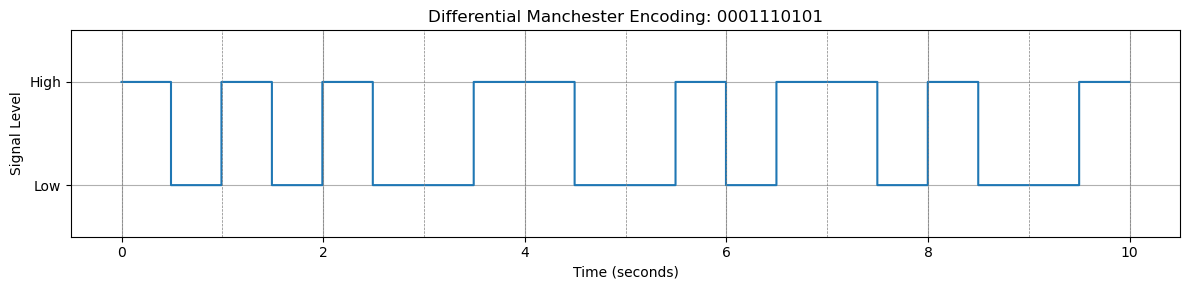

In [4]:
# Plotting
plt.figure(figsize=(12, 3))
plt.plot(t_seconds, signal, drawstyle='steps-pre')
plt.title("Differential Manchester Encoding: 0001110101")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Level")
plt.yticks([0, 1], ['Low', 'High'])
plt.ylim(-0.5, 1.5)
plt.grid(True)

# Add bit boundaries
for i in range(len(bitstream) + 1):
    plt.axvline(i * bit_duration_seconds, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()